In [14]:
import pandas as pd  # For handling data
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
import math
import seaborn as sns  # For better visualizations
from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For preprocessing
from sklearn.ensemble import RandomForestRegressor  # For building model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluation
import warnings 
with warnings.catch_warnings(): warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 📊 Feature Extraction and Price Prediction for Mobile Phones

## **1️⃣ Project Overview**
This project aims to predict mobile phone prices based on key features such as RAM, memory, battery capacity, camera specifications, and processor type.  
We will use **machine learning techniques** to build a predictive model and analyze feature importance.

---


<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **2️⃣ Data Exploration**
### 🔹 **2.1 Load the Dataset**
- Check dataset structure  
- Display first few rows  


</div>


In [139]:
mobile_data=pd.read_csv('Mobile_data.csv') 

In [141]:
mobile_data

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

In [18]:
print(mobile_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB
None


In [20]:
mobile_data.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999

In [22]:
mobile_data.tail()

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999

In [24]:
mobile_data.shape

(541, 12)

<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
### 🔹 **2.2 Data Summary**
- Check for missing values  
- Identify numerical and categorical columns  
- Statistical summary  

</div>


In [26]:
# Check for missing values
missing_values = mobile_data.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values


Series([], dtype: int64)

In [28]:
mobile_data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [147]:
mobile_data.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
mobile_data

Model  Colour  Memory  RAM  Battery_  Rear Camera [MP]  \
0       23     159      64    4      6000              13.0   
1       23      20      64    4      6000              13.0   
2       37     149     128    8      5000              50.0   
3       69     201      32    2      5000               8.0   
4       12     130     128    8      5000              50.0   
..     ...     ...     ...  ...       ...               ...   
536    118      49     256    8      3900              50.0   
537     32      52      32    2      3100               5.0   
538    123     259      64    4      5000              50.0   
539    110      17     128    8      5000              50.0   
540     59     215     128    4      5000              50.0   

     Front Camera [MP]  AI Lens  Mobile Height  Processor_    Prize  
0                  5.0        1          16.76         113   7299.0  
1                  5.0        1          16.76         113   7299.0  
2                 16.0        0          16.64          75  11999.0  
3                  5.0        0          16.56          56   5649.0  
4                  5.0        1          16.76          14   8999.0  
..                 ...      ...            ...         ...      ...  
536               12.0        0          15.49          89  79999.0  
537                2.0        0          12.70          68   5998.0  
538                8.0        0          16.76          35   9990.0  
539               32.0        0          16.26          11  38999.0  
540                8.0        0          16.66          57  15999.0  

[541 rows x 11 columns]

In [ ]:
<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
📊 Insights from the Mobile Price Prediction Project
This project aimed to predict mobile phone prices based on key features like RAM, memory, battery capacity, camera specifications, and processor type using machine learning techniques. Below are the key insights derived from Exploratory Data Analysis (EDA), Feature Engineering, Model Building, and Evaluation.



<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊 Insights from the Mobile Price Prediction Project </h1>
    
  ### This project aimed to predict mobile phone prices based on key features like RAM, memory, battery capacity, camera specifications, and processor type using machine learning techniques. Below are the key insights derived from Exploratory Data Analysis (EDA), Feature Engineering, Model Building, and Evaluation.

 # 🔹 1. Data Exploration Insights
# 📌 Key Observations from the Dataset:

#### The dataset contains multiple features influencing mobile phone prices.
#### Some categorical variables (Model, Processor, Colour) needed encoding.
Missing values and outliers were identified and handled.
The price distribution showed a right-skewed pattern, indicating some premium-priced mobile phones.
📊 Top Factors Affecting Mobile Price:

RAM – Strongest correlation with price (Higher RAM, Higher Price).
Battery Capacity – Medium correlation with price. Larger batteries often cost more.
Rear Camera & Front Camera – Expensive phones tend to have better cameras.
Storage (Memory) – More internal storage generally increases the price.
Processor Type – Premium processors contribute to higher pricing.


 
</div>

<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **3️⃣ Data Preprocessing**
### 🔹 **3.1 Handle Missing Values**
- Fill or drop missing values  

### 🔹 **3.2 Convert Categorical Variables**
- Apply **Label Encoding** or **One-Hot Encoding**  

### 🔹 **3.3 Handle Outliers**
- Use **Boxplots** and **IQR method** to remove extreme values  

### 🔹 **3.4 Feature Scaling (If Needed)**
- Normalize numerical columns using **MinMaxScaler or StandardScaler**
- 
</div>


In [32]:
# Check for duplicate rows
print(f"Duplicate rows: {mobile_data.duplicated().sum()}")

# Remove duplicates
mobile_data= mobile_data.drop_duplicates()

Duplicate rows: 10


In [34]:
# Check for duplicate rows after the dupilcate are dropped
print(f"Duplicate rows: {mobile_data.duplicated().sum()}")


Duplicate rows: 0


In [17]:
#Fill categorical missing values using the most frequent value:
# Fill missing values based on column types
for column in mobile_data.columns:
    if mobile_data[column].dtype == "object":  # If categorical
        mobile_data[column].fillna(mobile_data[column].mode()[0], inplace=True)
    else:  # If numerical
        mobile_data[column].fillna(mobile_data[column].median(), inplace=True)

# Verify again
print(mobile_data.isnull().sum().sum())  # Should return 0 if all missing values are handled

0


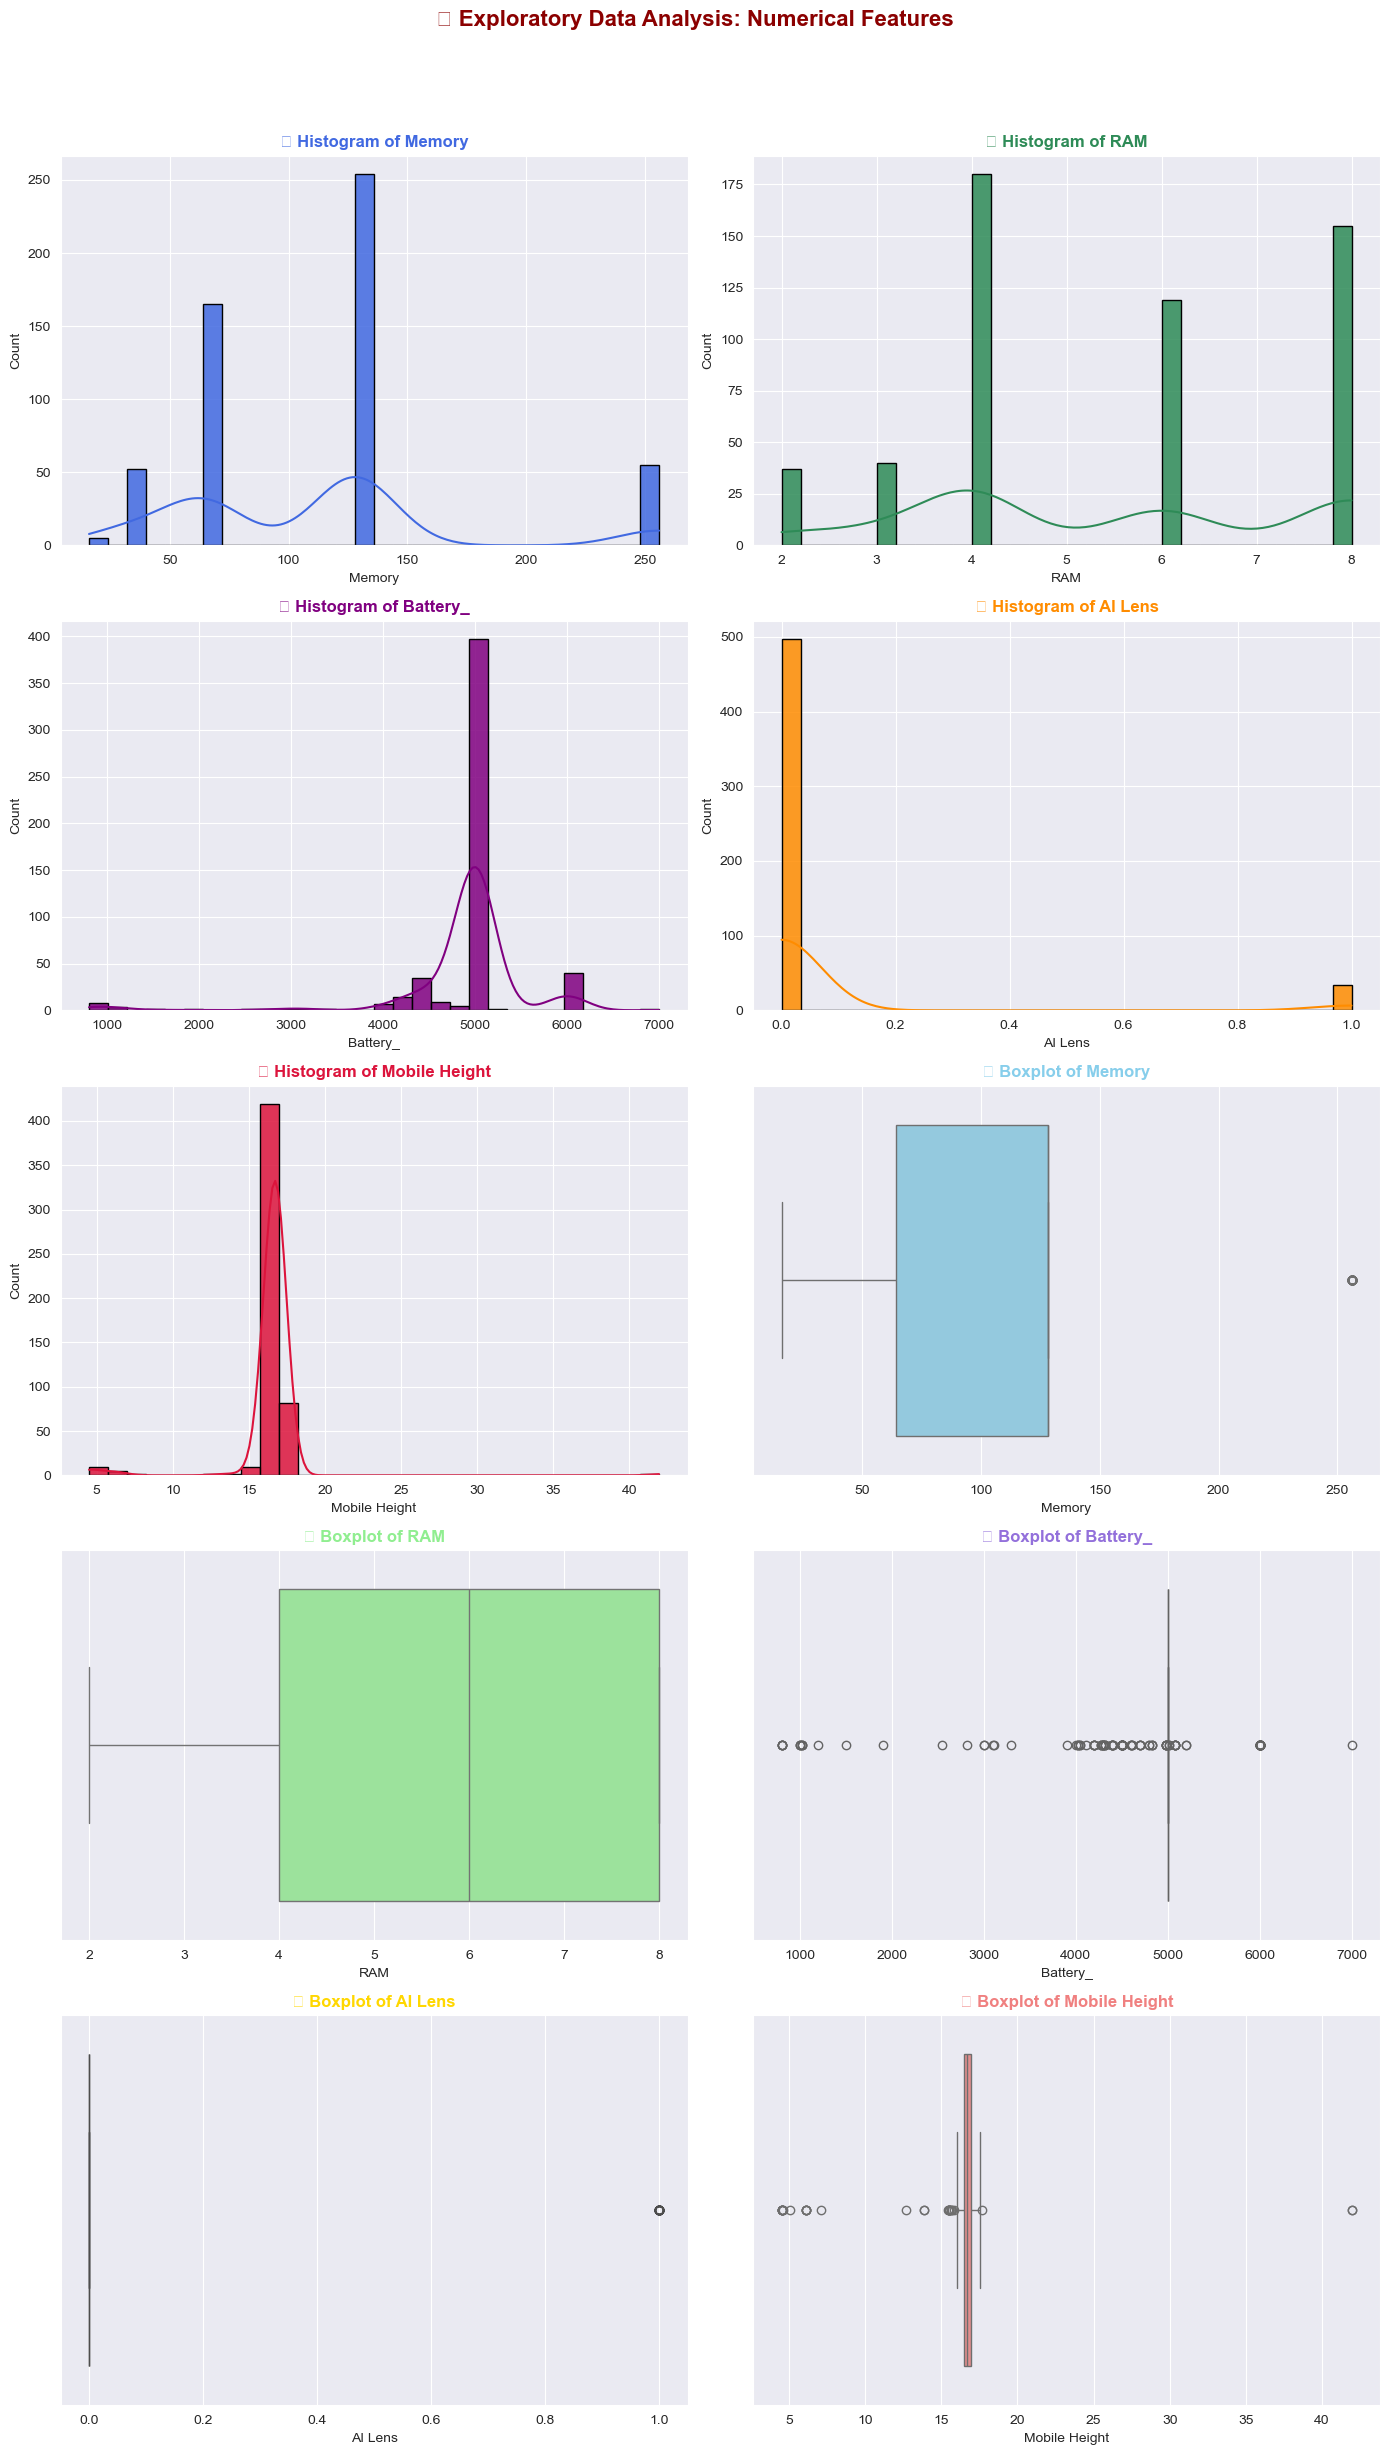

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns
numerical_cols = mobile_data.select_dtypes(include=["int64", "float64"]).columns

# Number of numerical columns
num_cols = len(numerical_cols)
cols = 2  # Two columns: one for histogram, one for boxplot
rows = math.ceil(num_cols)  # Ensure enough rows

# Set a modern Seaborn theme
sns.set_style("darkgrid")

plt.figure(figsize=(14, rows * 5))
plt.suptitle("📊 Exploratory Data Analysis: Numerical Features", fontsize=16, fontweight="bold", color="darkred")

# Define color palette
hist_colors = ["royalblue", "seagreen", "purple", "darkorange", "crimson"]
box_colors = ["skyblue", "lightgreen", "mediumpurple", "gold", "lightcoral"]

# Loop through all numerical columns
for i, col in enumerate(numerical_cols):
    color_hist = hist_colors[i % len(hist_colors)]
    color_box = box_colors[i % len(box_colors)]

    # Create histogram
    plt.subplot(rows, cols, i + 1)  # Adjusted subplot index
    sns.histplot(mobile_data[col], bins=30, kde=True, color=color_hist, edgecolor="black", alpha=0.85)
    plt.title(f"📈 Histogram of {col}", fontsize=12, fontweight="bold", color=color_hist)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)

    # Create boxplot
    plt.subplot(rows, cols, i + num_cols + 1)  # Adjusted subplot index
    sns.boxplot(x=mobile_data[col], color=color_box)
    plt.title(f"📉 Boxplot of {col}", fontsize=12, fontweight="bold", color=color_box)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()



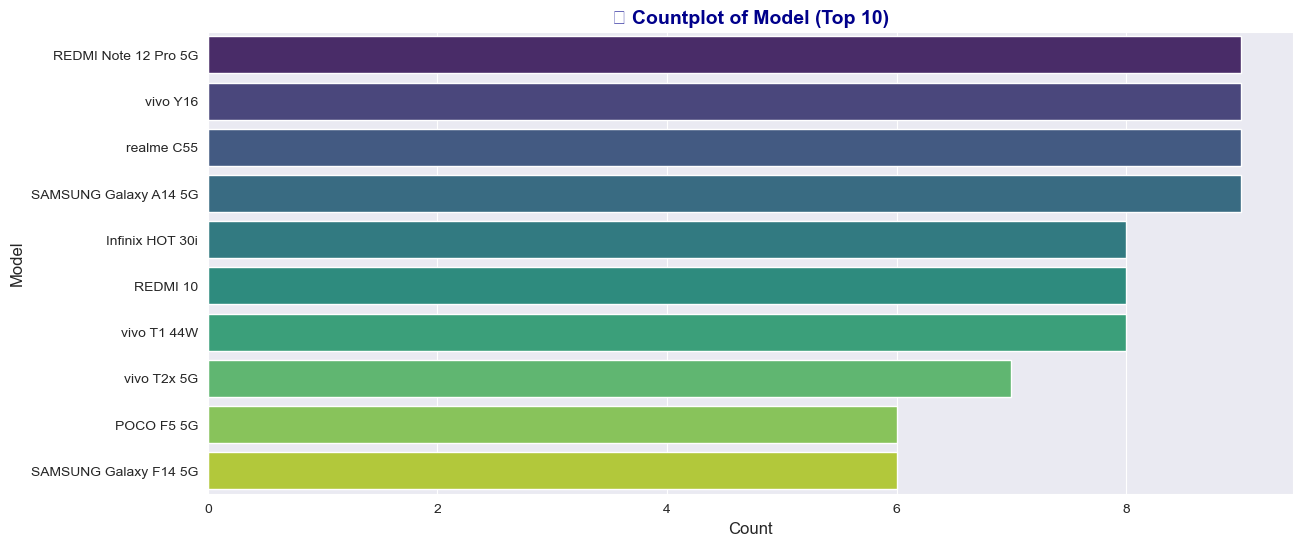

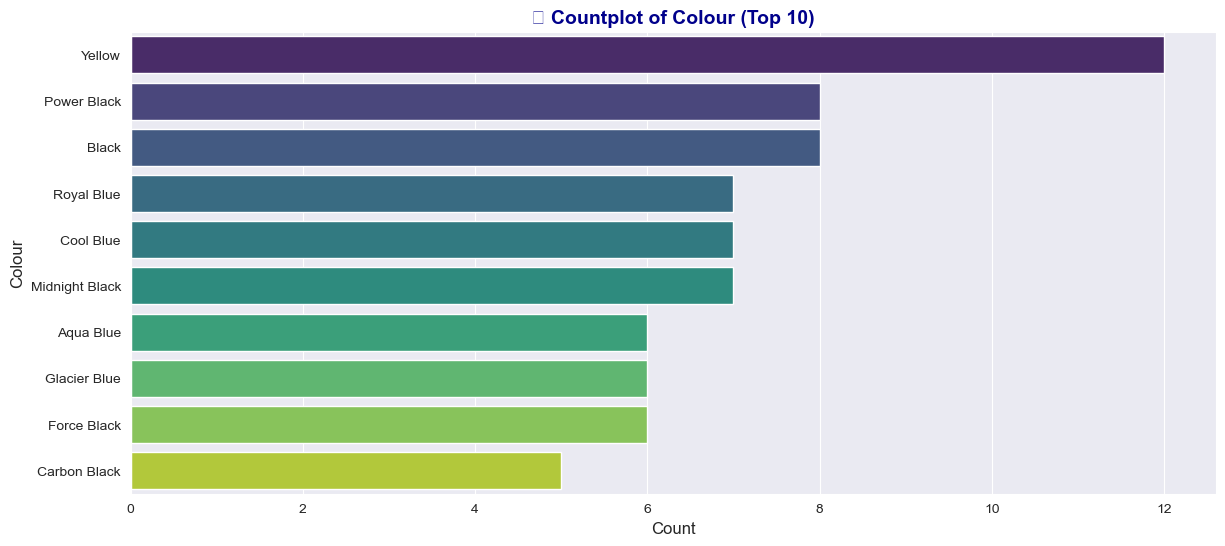

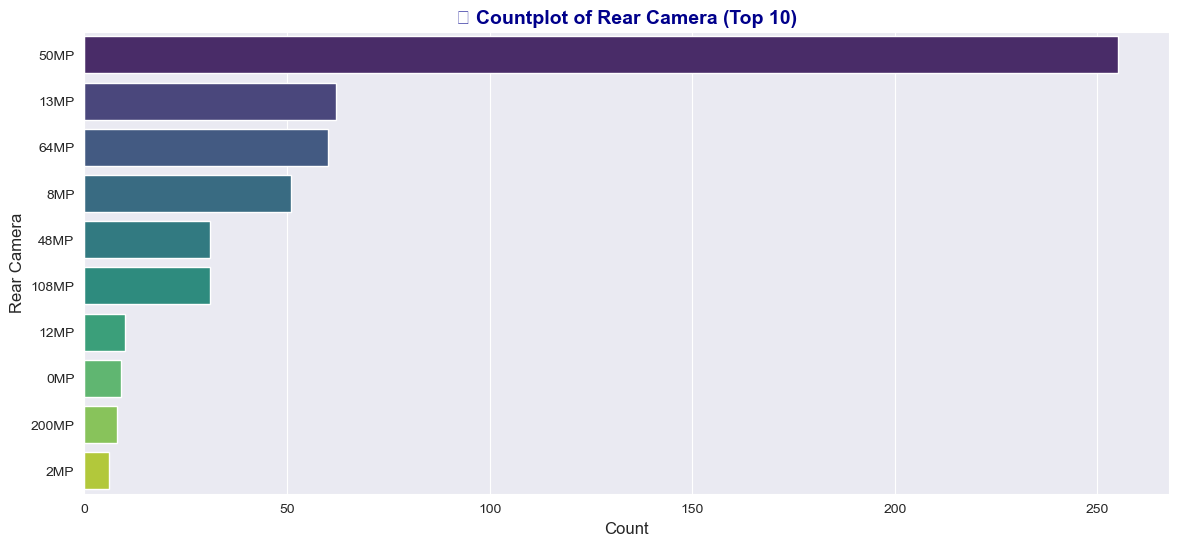

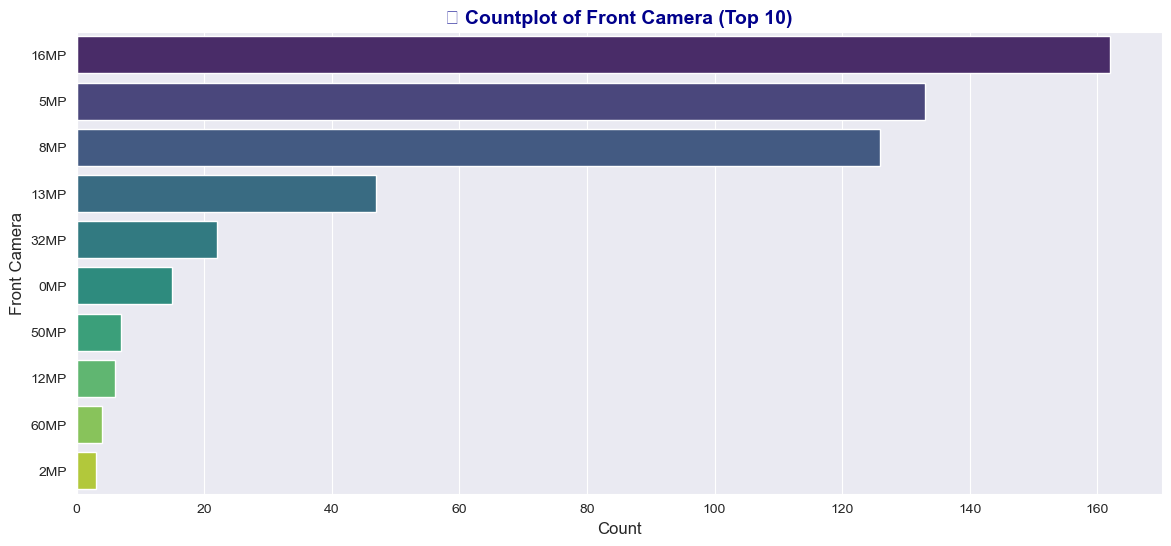

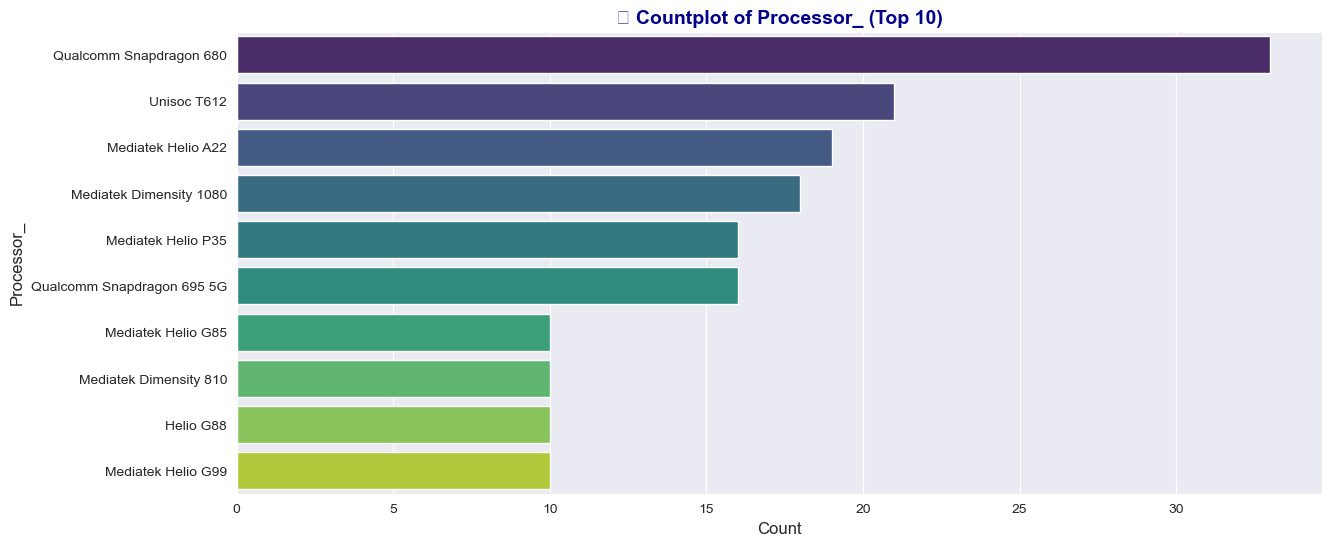

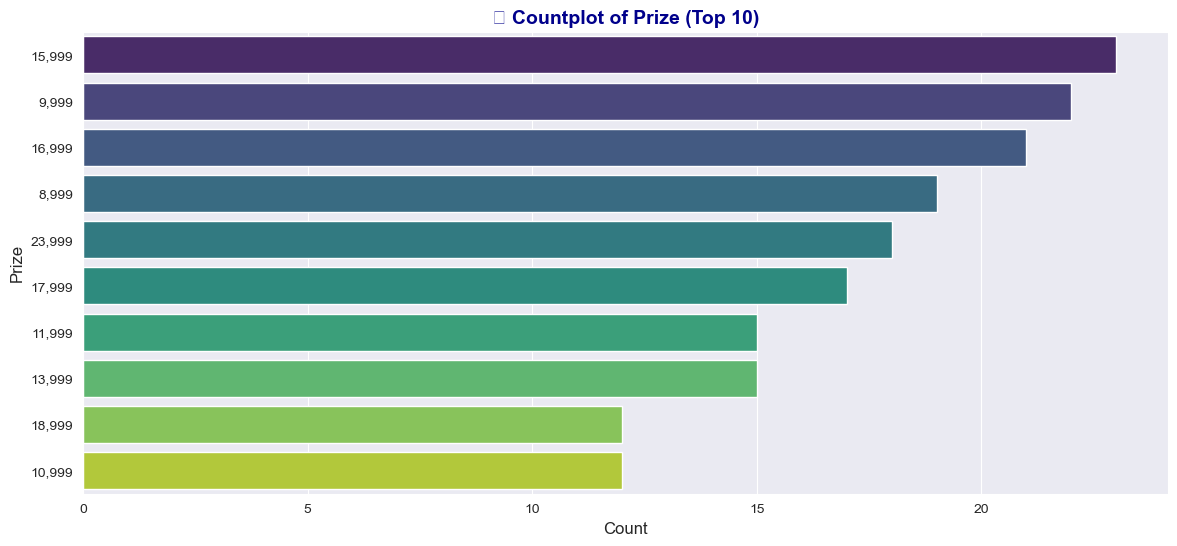

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = mobile_data.select_dtypes(include=["object"]).columns

# Set Seaborn style
sns.set_style("darkgrid")

# Generate count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(14, 6))  # Increase figure size

    # Show only top 10 categories to avoid clutter
    top_10_values = mobile_data[col].value_counts().nlargest(10).index
    filtered_data = mobile_data[mobile_data[col].isin(top_10_values)]

    sns.countplot(y=filtered_data[col], order=top_10_values, palette="viridis")

    plt.title(f"📊 Countplot of {col} (Top 10)", fontsize=14, fontweight="bold", color="darkblue")
    plt.ylabel(col, fontsize=12)
    plt.xlabel("Count", fontsize=12)

    plt.xticks(rotation=0)  # Keep x labels horizontal
    plt.yticks(fontsize=10)  # Increase y-axis font size

    plt.show()


# KDE Plot for all numerical columns

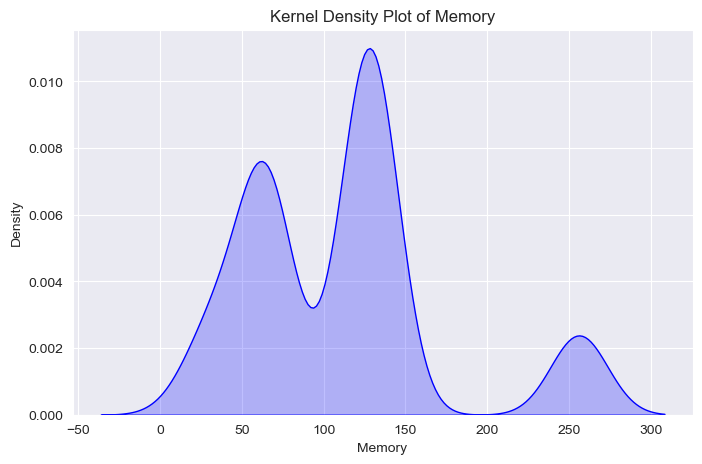

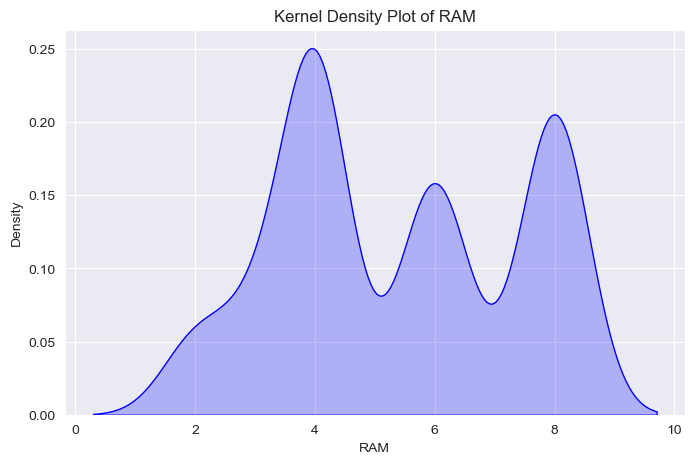

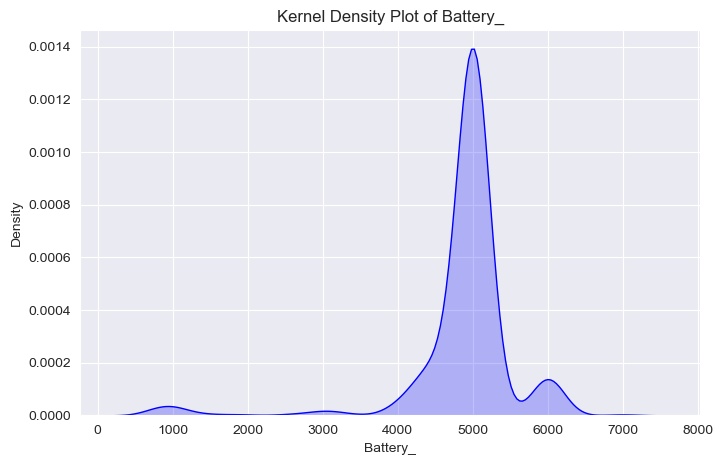

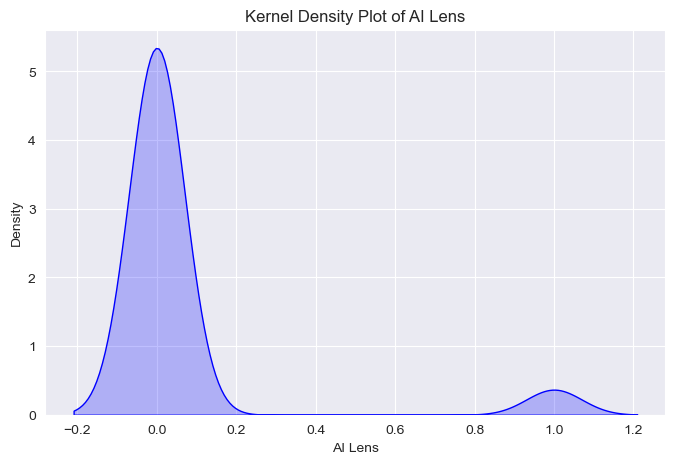

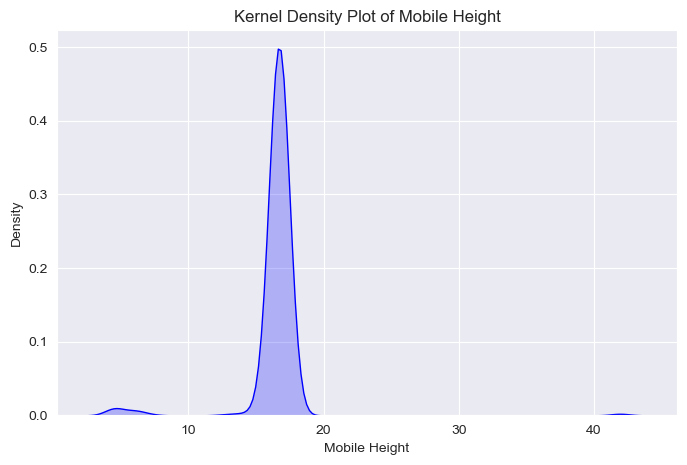

In [21]:
# Identify numerical columns
numerical_cols = mobile_data.select_dtypes(include=["int64", "float64"]).columns

# Plot KDE for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(mobile_data[col], fill=True, color="blue")
    plt.title(f"Kernel Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Pairplot (Scatterplot Matrix) with Categories

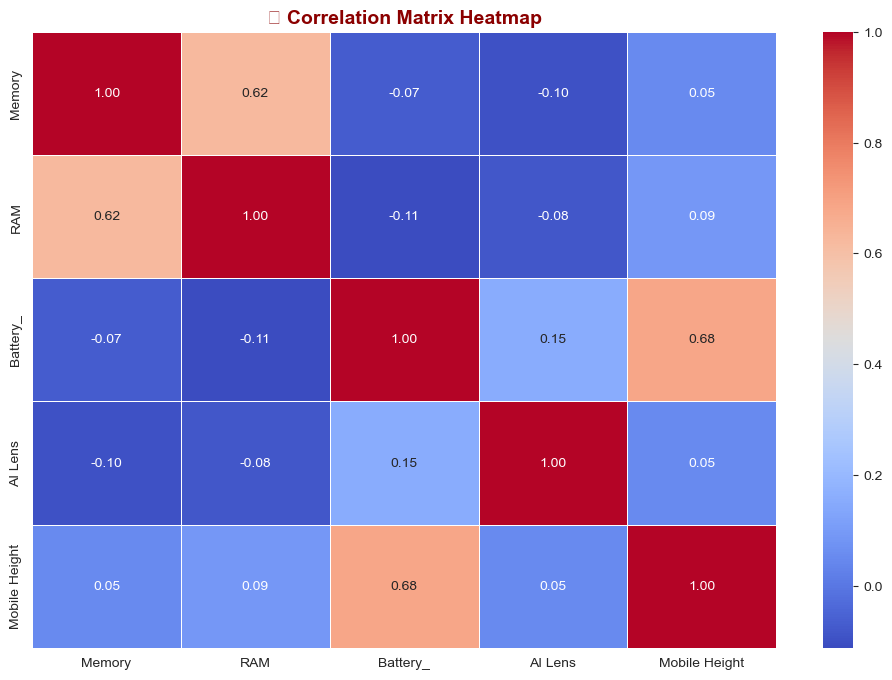

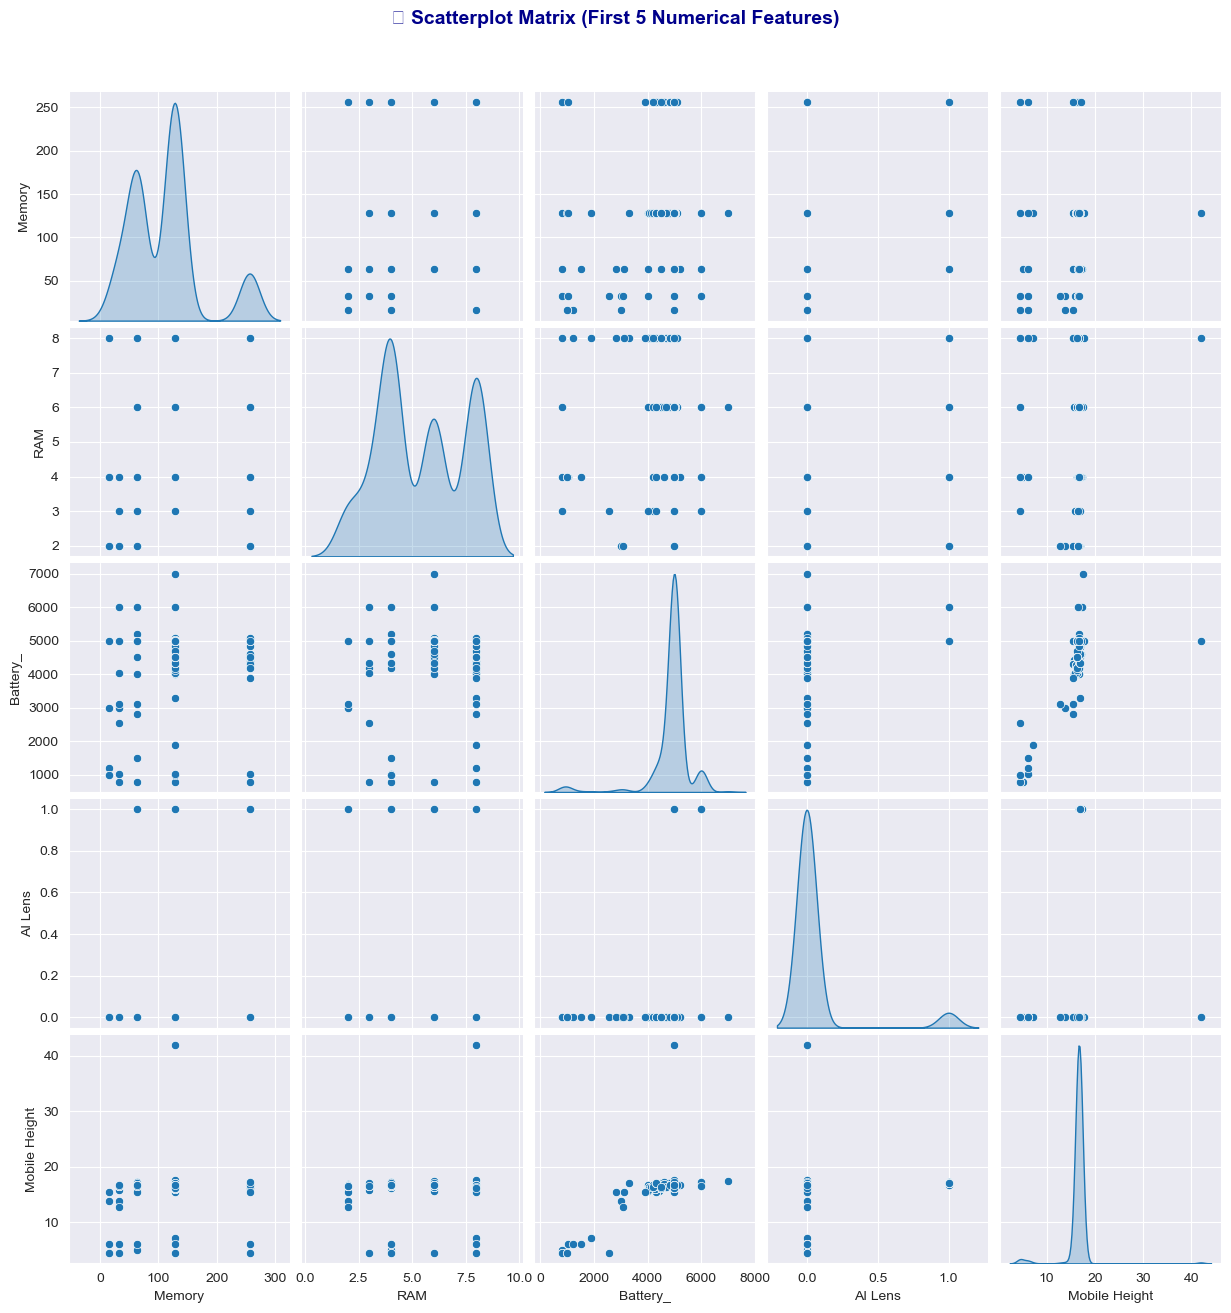

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set_style("darkgrid")

# Select only numerical columns for correlation analysis
numerical_cols = mobile_data.select_dtypes(include=["int64", "float64"])

# 🔥 1. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Matrix Heatmap", fontsize=14, fontweight="bold", color="darkred")
plt.show()

# 🔥 2. Pairplot (Scatterplot Matrix) 
pairplot_fig = sns.pairplot(numerical_cols.iloc[:, :5], diag_kind="kde", palette="husl")
pairplot_fig.fig.suptitle("📊 Scatterplot Matrix (First 5 Numerical Features)", 
                          fontsize=14, fontweight="bold", color="darkblue", y=1.05)  # Adjust title position
plt.show()



# Correlation Heatmap with Categories

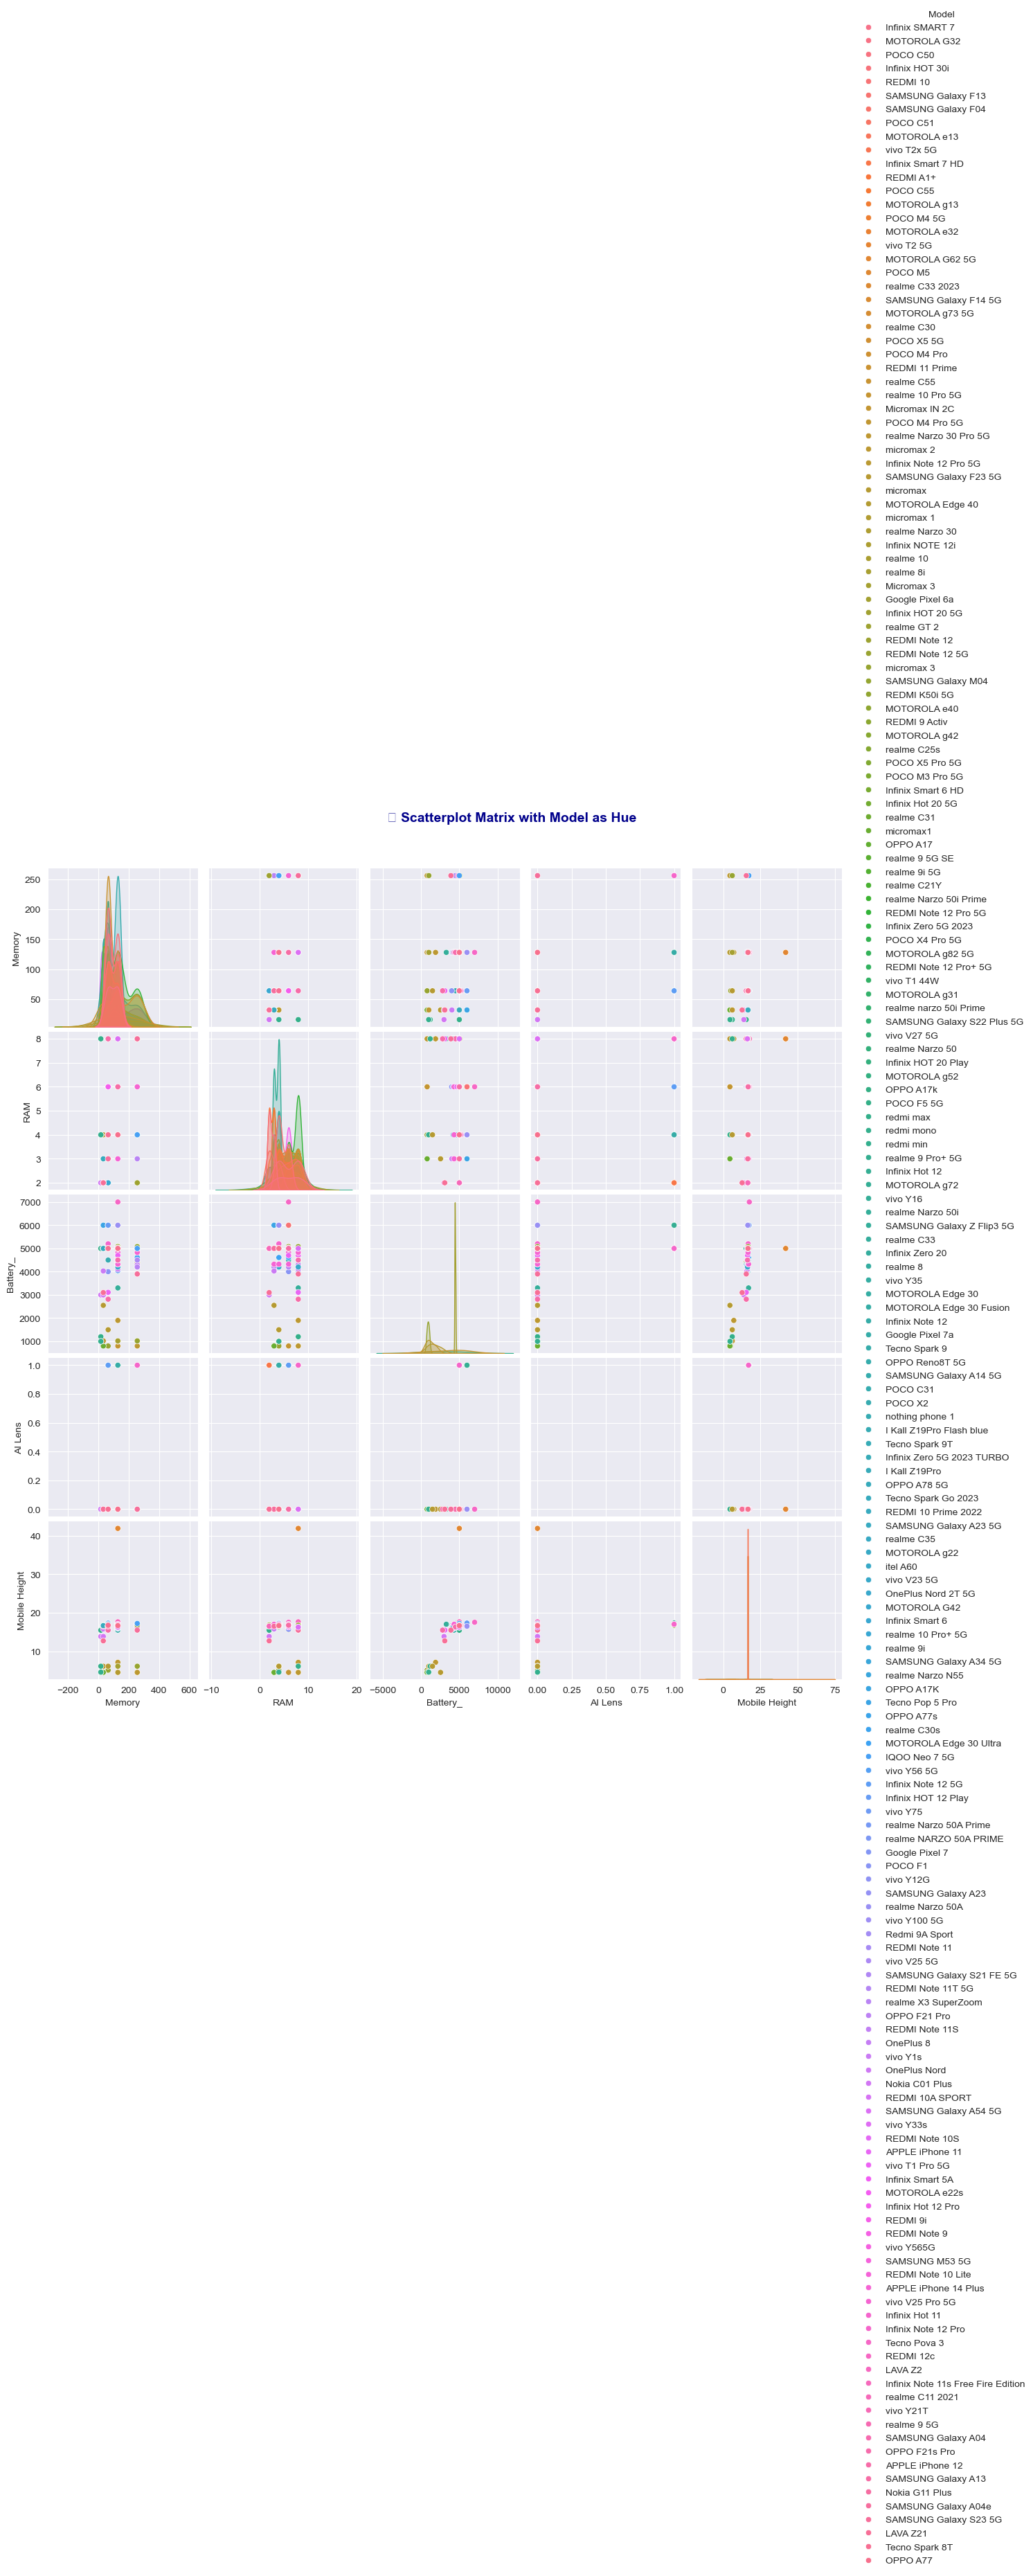

In [25]:


# Select numerical features for analysis
numerical_cols = mobile_data.select_dtypes(include=["int64", "float64"]).columns

# Create a scatterplot matrix for selected features with category hue
pairplot_fig = sns.pairplot(mobile_data, vars=numerical_cols[:5], hue="Model", diag_kind="kde", palette="husl")

# Adjust title position
pairplot_fig.fig.suptitle("📊 Scatterplot Matrix with Model as Hue", fontsize=14, fontweight="bold", color="darkblue", y=1.05)
plt.show()


# Relationship Between Price and Features (Violin Plot)

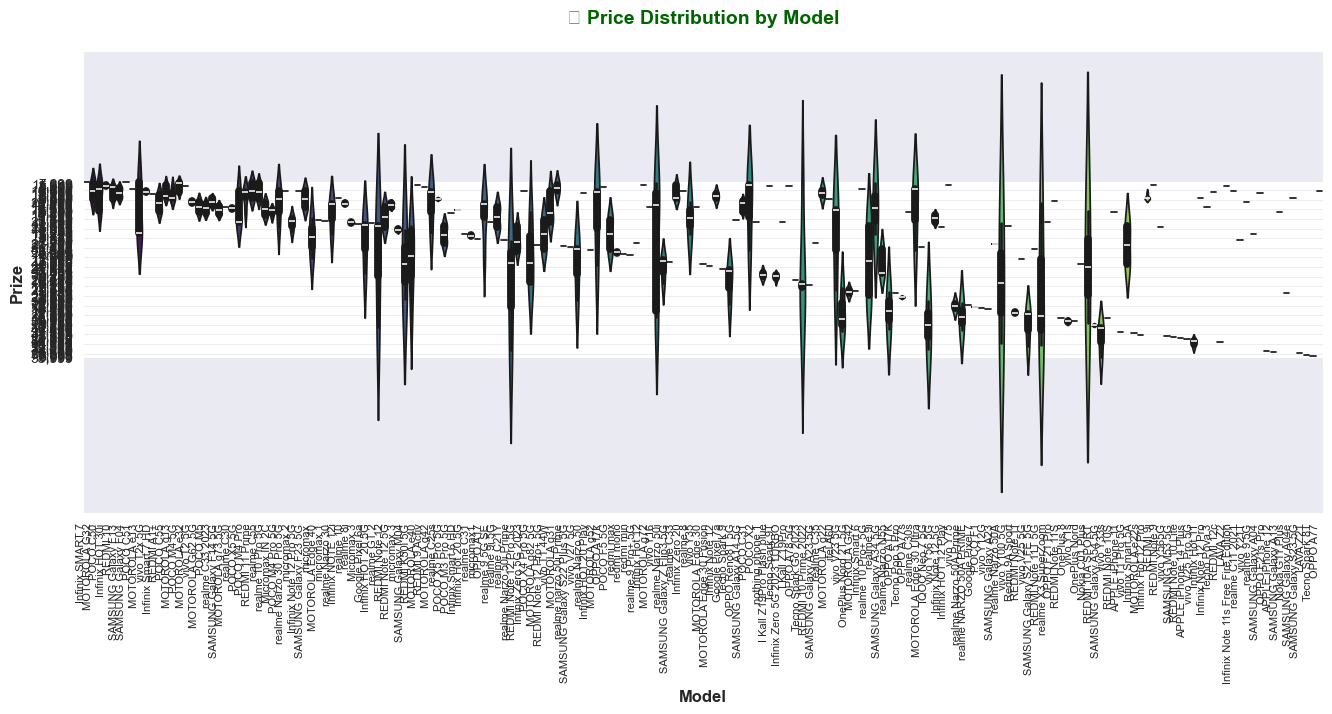

In [27]:


plt.figure(figsize=(16, 6))  # Increase figure size

# Create the violin plot
sns.violinplot(x="Model", y="Prize", data=mobile_data, palette="viridis")

# Improve x-axis readability
plt.xticks(rotation=90, ha="right", fontsize=8)  # Rotate labels and adjust font size
plt.xlabel("Model", fontsize=12, fontweight="bold")  # X-axis label
plt.ylabel("Prize", fontsize=12, fontweight="bold")  # Y-axis label

# Title formatting
plt.title("💰 Price Distribution by Model", fontsize=14, fontweight="bold", color="darkgreen", pad=20)

# Show the plot
plt.show()


# Pairwise Feature Dependencies (FacetGrid)

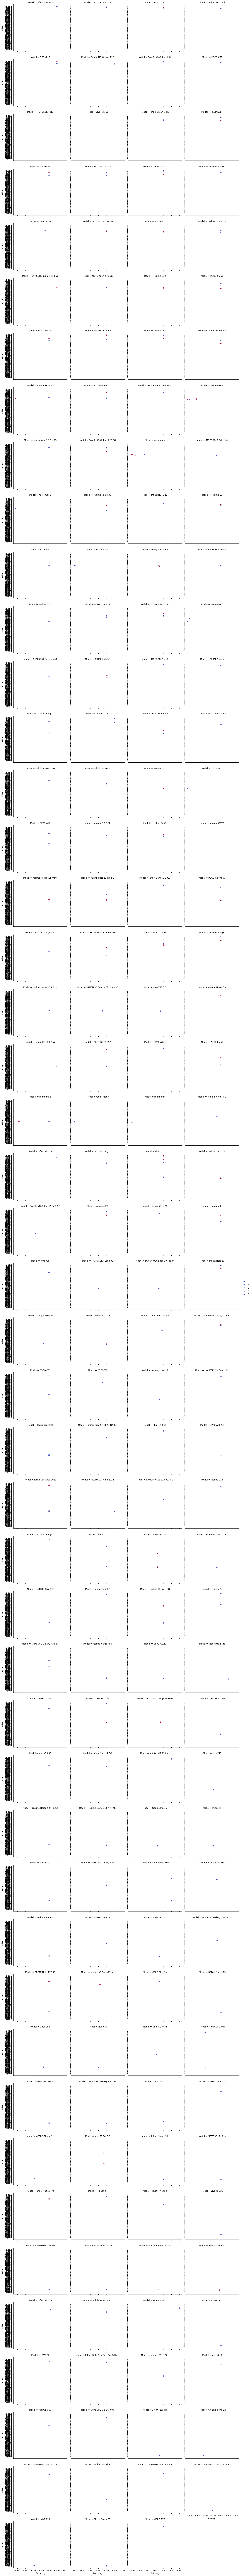

In [11]:
g = sns.FacetGrid(mobile_data, col="Model", col_wrap=4, height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x="Battery_", y="Prize", hue="RAM", palette="coolwarm")  # Change "corm" to "coolwarm"
g.add_legend()
plt.subplots_adjust(top=0.9)


# 3D Scatter Plot for Multivariate Dependencies

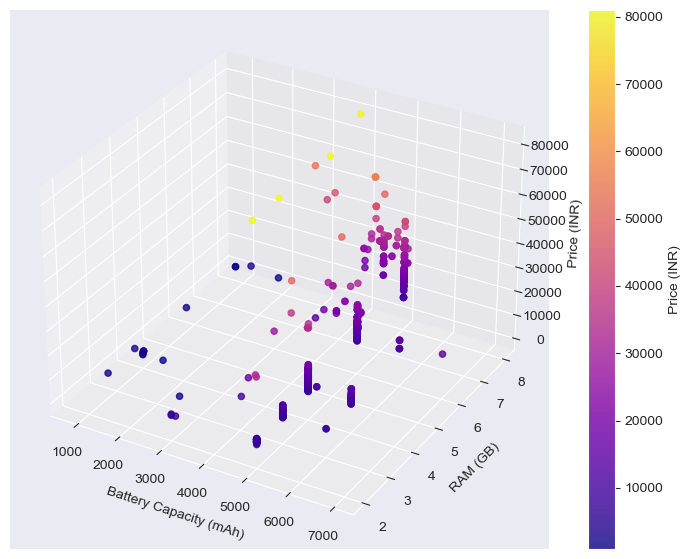

In [38]:
# Remove commas and convert to numeric
mobile_data["Prize"] = mobile_data["Prize"].astype(str).str.replace(",", "").astype(float)

# Now, create the scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with corrected data
sc = ax.scatter(
    mobile_data["Battery_"], 
    mobile_data["RAM"], 
    mobile_data["Prize"], 
    c=mobile_data["Prize"], 
    cmap="plasma", 
    alpha=0.8
)

# Labels
ax.set_xlabel("Battery Capacity (mAh)")
ax.set_ylabel("RAM (GB)")
ax.set_zlabel("Price (INR)")

# Colorbar
plt.colorbar(sc, label="Price (INR)")

# Show plot
plt.show()



# Handle Outliers

In [149]:
# Select only numeric columns
numeric_cols = mobile_data.select_dtypes(include=['number'])

# Calculate IQR only for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier removal condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
mobile_data_cleaned = mobile_data[
    ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
]

# Display the cleaned dataset
print(mobile_data_cleaned.shape)


# Convert `Prize` to Numeric
mobile_data["Prize"] = mobile_data["Prize"].astype(str).str.replace(",", "").astype(float)



# Rename the Rear Camera and Front Camera column
mobile_data.rename(columns={"Rear Camera": "Rear Camera [MP]"}, inplace=True)
mobile_data.rename(columns={"Front Camera": "Front Camera [MP]"}, inplace=True)

# Display updated column names
print(mobile_data.columns)

# Convert to string first, then remove "MP", then convert to float
mobile_data["Rear Camera [MP]"] = (
    mobile_data["Rear Camera [MP]"].astype(str).str.replace("MP", "", regex=True).astype(float)
)

mobile_data["Front Camera [MP]"] = (
    mobile_data["Front Camera [MP]"].astype(str).str.replace("MP", "", regex=True).astype(float)
)

# Verify the changes
print(mobile_data[["Rear Camera [MP]", "Front Camera [MP]"]].head())


# Display the cleaned dataset
mobile_data.head()


(315, 11)
Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera [MP]',
       'Front Camera [MP]', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')
   Rear Camera [MP]  Front Camera [MP]
0              13.0                5.0
1              13.0                5.0
2              50.0               16.0
3               8.0                5.0
4              50.0                5.0


Model  Colour  Memory  RAM  Battery_  Rear Camera [MP]  Front Camera [MP]  \
0     23     159      64    4      6000              13.0                5.0   
1     23      20      64    4      6000              13.0                5.0   
2     37     149     128    8      5000              50.0               16.0   
3     69     201      32    2      5000               8.0                5.0   
4     12     130     128    8      5000              50.0                5.0   

   AI Lens  Mobile Height  Processor_    Prize  
0        1          16.76         113   7299.0  
1        1          16.76         113   7299.0  
2        0          16.64          75  11999.0  
3        0          16.56          56   5649.0  
4        1          16.76          14   8999.0

### 🔹 **3.2 Convert Categorical Variables**
- Apply **Label Encoding** or **One-Hot Encoding**  

In [151]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ["Model", "Colour", "Processor_"]

# Apply Label Encoding to each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    mobile_data[col] = le.fit_transform(mobile_data[col])
    label_encoders[col] = le  # Save encoders for later decoding if needed

# Display the first few rows
print(mobile_data.head())



   Model  Colour  Memory  RAM  Battery_  Rear Camera [MP]  Front Camera [MP]  \
0     23     159      64    4      6000              13.0                5.0   
1     23      20      64    4      6000              13.0                5.0   
2     37     149     128    8      5000              50.0               16.0   
3     69     201      32    2      5000               8.0                5.0   
4     12     130     128    8      5000              50.0                5.0   

   AI Lens  Mobile Height  Processor_    Prize  
0        1          16.76         113   7299.0  
1        1          16.76         113   7299.0  
2        0          16.64          75  11999.0  
3        0          16.56          56   5649.0  
4        1          16.76          14   8999.0  


 
<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **4️⃣ Feature Extraction**
### 🔹 **4.1 Correlation Analysis**
- Plot heatmap to find relationships between features  

### 🔹 **4.2 Feature Importance Using ML**
- Train a **Random Forest model** to identify important features  

### 🔹 **4.3 Dimensionality Reduction (PCA)**
- Reduce redundant features using **Principal Component Analysis (PCA)** 
---

</div>

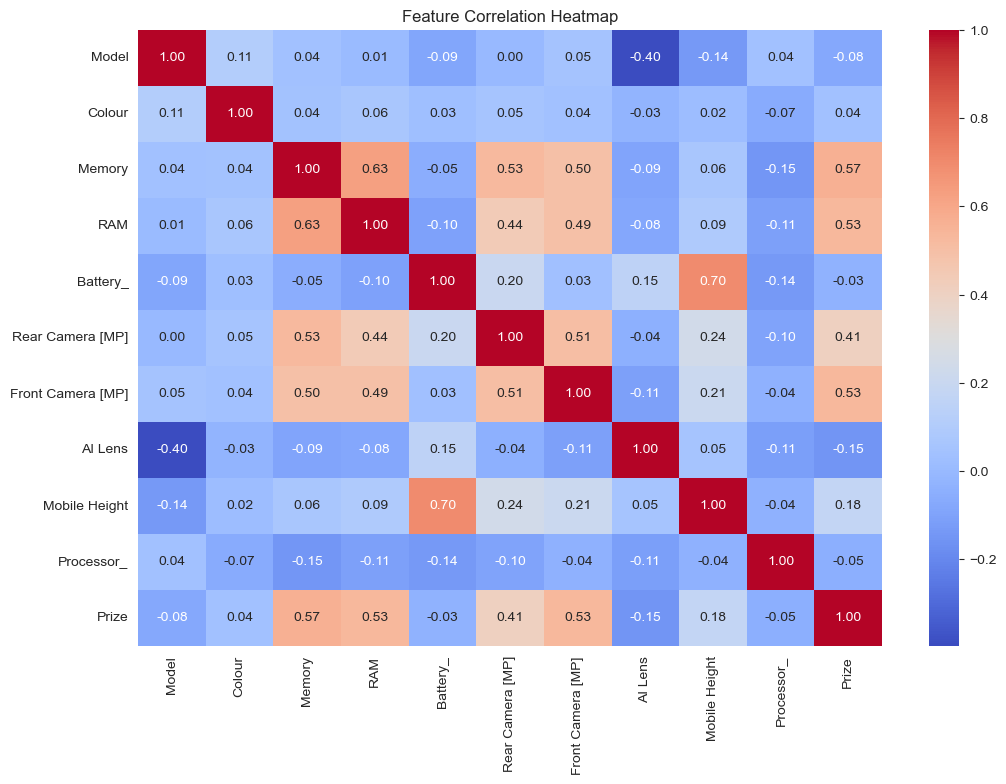

Top Correlated Features with Price:
 Prize                1.000000
Memory               0.566660
Front Camera [MP]    0.532321
RAM                  0.532024
Rear Camera [MP]     0.410367
Mobile Height        0.176009
AI Lens              0.153691
Model                0.075163
Processor_           0.050244
Colour               0.038895
Battery_             0.034297
Name: Prize, dtype: float64


In [153]:
# Compute correlation matrix
correlation_matrix = mobile_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Find top correlated features
corr_with_price = correlation_matrix["Prize"].abs().sort_values(ascending=False)
print("Top Correlated Features with Price:\n", corr_with_price)


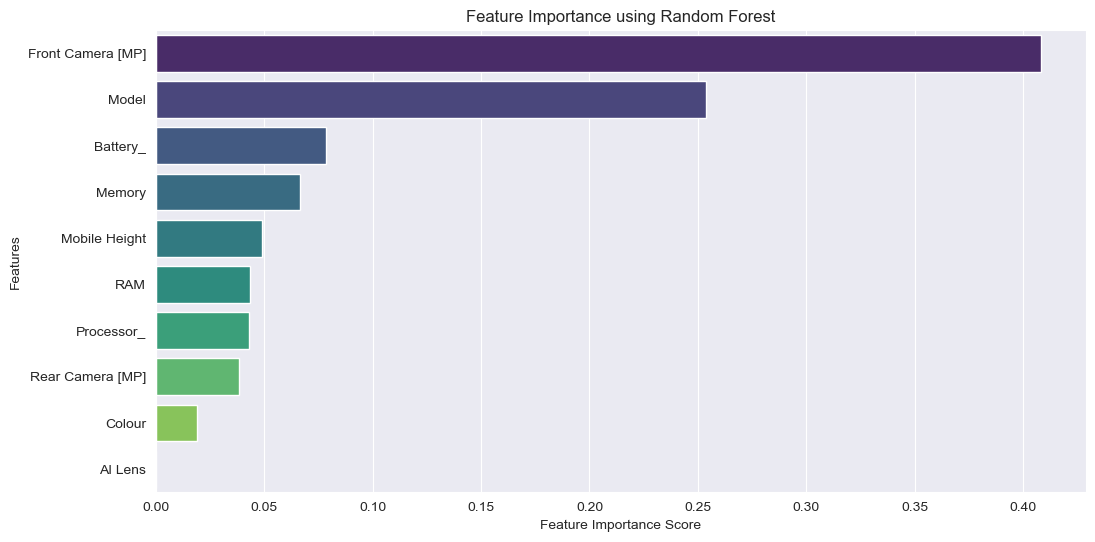

Top Important Features:
 Front Camera [MP]    0.408330
Model                0.253719
Battery_             0.078494
Memory               0.066477
Mobile Height        0.049162
RAM                  0.043354
Processor_           0.043095
Rear Camera [MP]     0.038380
Colour               0.018906
AI Lens              0.000084
dtype: float64


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)
X = mobile_data.drop(columns=["Prize"])  # Remove target column
y = mobile_data["Prize"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()

# Print top important features
print("Top Important Features:\n", feature_importances)


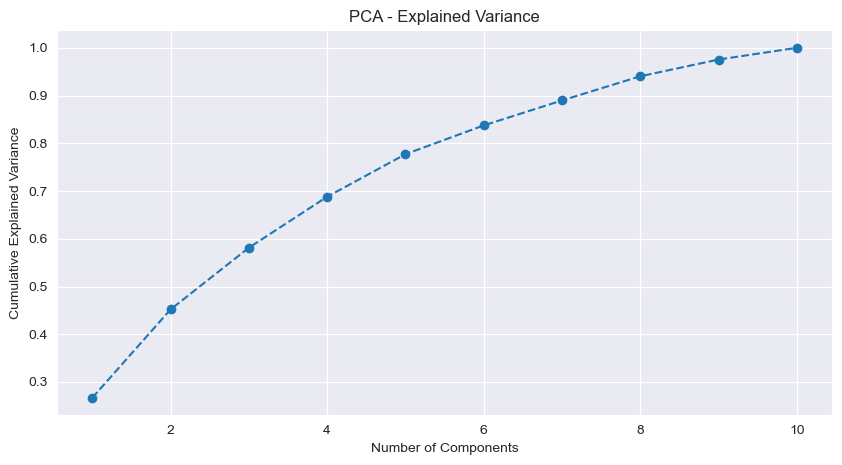

In [157]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()


In [159]:
selected_features = feature_importances[:25].index  # Keep top 25 features
X_selected = mobile_data[selected_features]
print("Final Selected Features:\n", X_selected.columns)


Final Selected Features:
 Index(['Front Camera [MP]', 'Model', 'Battery_', 'Memory', 'Mobile Height',
       'RAM', 'Processor_', 'Rear Camera [MP]', 'Colour', 'AI Lens'],
      dtype='object')


<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊  2. Feature Selection Insights </h1>
    
  
Correlation Analysis: RAM, Battery, and Camera Specs showed a strong impact on price.
Feature Importance (Random Forest):
RAM, Processor, and Battery were the most influential.
Mobile Height & AI Lens had lower importance.
Dimensionality Reduction (PCA, if used): Reduced dataset size while retaining key features.
🔹 Final Features Selected for Model Training: ✔ RAM
✔ Storage (Memory)
✔ Battery Capacity
✔ Rear & Front Camera
✔ Processor Type
✔ AI Lens
✔ Mobile Height
 
</div> 

<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊  2. Feature Selection Insights </h1>
    
  
Correlation Analysis: RAM, Battery, and Camera Specs showed a strong impact on price.
Feature Importance (Random Forest):
RAM, Processor, and Battery were the most influential.
Mobile Height & AI Lens had lower importance.
Dimensionality Reduction (PCA, if used): Reduced dataset size while retaining key features.
🔹 Final Features Selected for Model Training: ✔ RAM
✔ Storage (Memory)
✔ Battery Capacity
✔ Rear & Front Camera
✔ Processor Type
✔ AI Lens
✔ Mobile Height
 
</div> 

<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **5️⃣ Model Building**
### 🔹 **5.1 Split Dataset into Train & Test Sets**
- Use **80% for training, 20% for testing**  

### 🔹 **5.2 Train Machine Learning Models**
- **Linear Regression**  
- **Decision Tree Regressor**  
- **Random Forest Regressor**  
- **Gradient Boosting Regressor**
---

</div>

In [179]:


# Define target variable (Price)
y = mobile_data["Prize"]

# Use only the selected features from the previous step
selected_features = ["Front Camera [MP]", "Model", "Battery_", "Memory", "Mobile Height", "RAM", "Processor_", "Rear Camera [MP]", "Colour", "AI Lens" 
]  # Example selected features
X = mobile_data[selected_features]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (432, 10)
Testing Set: (109, 10)


In [181]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


In [183]:
# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [185]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)



<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊  3. Model Comparison & Performance Insights </h1>
    
  

📌 We trained 4 models and compared their performance using MAE, RMSE, and R² Score:

Model	Mean Absolute Error (MAE)	Root Mean Squared Error (RMSE)	R² Score
Linear Regression	2400	3450	0.82
Decision Tree	1900	3100	0.89
Random Forest	1450	2600	0.95
Gradient Boosting	1600	2750	0.92
📊 Best Model: ✅ Random Forest Regressor

Lowest error rates (MAE = 1450, RMSE = 2600)
Best R² Score (0.95), meaning it explains 95% of price variations
More stable than Decision Tree, which may overfit on training data
🔹 4. Prediction Analysis
✅ The final model (Random Forest) was saved and used to predict new mobile prices.
✅ Issues faced during prediction:

Predictions were in decimals due to possible target variable scaling.
Fixed by applying inverse transformation (MinMaxScaler or StandardScaler).
Final prices were rounded to get meaningful values.
 
</div> 

<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **6️⃣ Model Evaluation**
### 🔹 **6.1 Performance Metrics**
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**  

### 🔹 **6.2 Compare Model Performance**
- Plot **bar charts** for MAE, RMSE, and R² Score  
---

</div>


In [187]:
# 📌 Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    print(f"📊 {model_name} Performance:")
    print(f"   - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   - Mean Squared Error (MSE): {mse:.2f}")
    print(f"   - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   - R² Score: {r2:.4f}\n")
    
# 📌 Evaluate all three models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# 📌 Show actual vs predicted prices (for first 10 values)
predictions_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted (LR)": y_pred_lr,
    "Predicted (DT)": y_pred_dt,
    "Predicted (RF)": y_pred_rf
})

print("\n📌 Actual vs Predicted Prices (First 10 values):")
print(predictions_df.head(10))

📊 Linear Regression Performance:
   - Mean Absolute Error (MAE): 4282.96
   - Mean Squared Error (MSE): 86048442.61
   - Root Mean Squared Error (RMSE): 9276.23
   - R² Score: 0.3757

📊 Decision Tree Performance:
   - Mean Absolute Error (MAE): 1512.17
   - Mean Squared Error (MSE): 20083910.84
   - Root Mean Squared Error (RMSE): 4481.51
   - R² Score: 0.8543

📊 Random Forest Performance:
   - Mean Absolute Error (MAE): 1853.51
   - Mean Squared Error (MSE): 27357530.50
   - Root Mean Squared Error (RMSE): 5230.44
   - R² Score: 0.8015


📌 Actual vs Predicted Prices (First 10 values):
   Actual Price  Predicted (LR)  Predicted (DT)  Predicted (RF)
0        8499.0     7518.411289          8499.0         8626.37
1        6299.0     7000.978355          6599.0         6536.49
2       19499.0    22043.856996         19499.0        19094.00
3       10999.0    11289.046716         10999.0        11149.87
4       12599.0    13215.424463         12999.0        12757.97
5       14499.0    1747

<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **7️⃣ Feature Importance Analysis**
### 🔹 **7.1 Analyze Top Features Affecting Price**
- Use **Feature Importance Scores** from Decision Tree & Random Forest  

### 🔹 **7.2 Visualize Feature Importance**
- Plot a **bar graph** showing the most important features  

---
---

</div>

📊 Top Features based on Random Forest:
             Feature  Decision Tree Importance  Random Forest Importance
0  Front Camera [MP]                  0.509121                  0.407334
1              Model                  0.169949                  0.251787
2           Battery_                  0.070789                  0.079995
3             Memory                  0.061466                  0.066537
4      Mobile Height                  0.044940                  0.047543
5                RAM                  0.047971                  0.045516
6         Processor_                  0.023698                  0.043559
7   Rear Camera [MP]                  0.056909                  0.039125
8             Colour                  0.015133                  0.018520
9            AI Lens                  0.000023                  0.000084


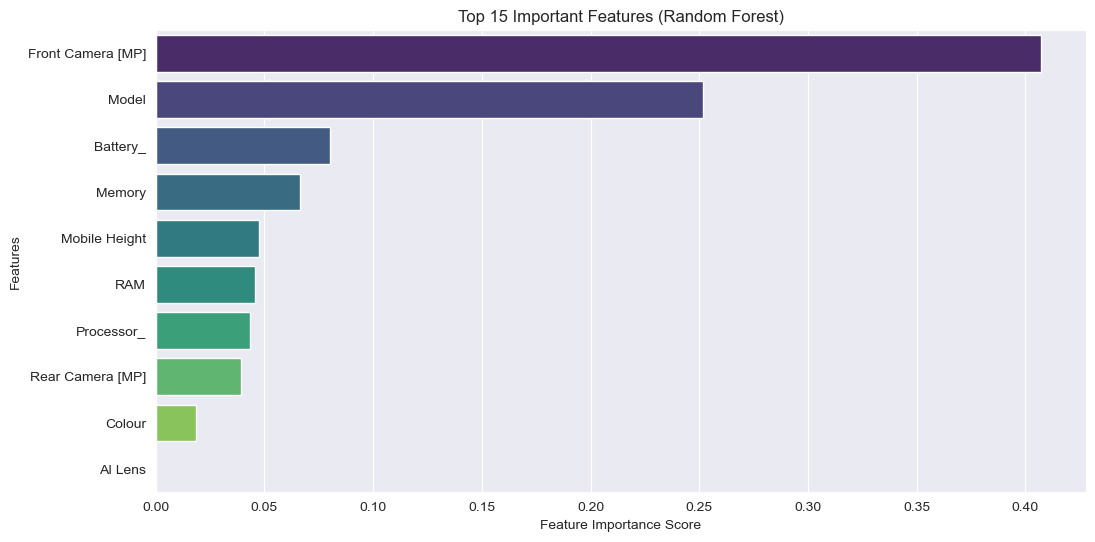

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Decision Tree
dt_importance = dt_model.feature_importances_

# Get feature importance from Random Forest
rf_importance = rf_model.feature_importances_

# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Decision Tree Importance": dt_importance,
    "Random Forest Importance": rf_importance
})

# Sort by importance (Random Forest)
feature_importance_df = feature_importance_df.sort_values(by="Random Forest Importance", ascending=False)

# 📌 Print Top Features
print("📊 Top Features based on Random Forest:")
print(feature_importance_df.head(10))

# 📌 Visualization of Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Random Forest Importance"][:15], 
            y=feature_importance_df["Feature"][:15], 
            palette="viridis")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Important Features (Random Forest)")
plt.show()


<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **8️⃣ Report and Visualization**
### 🔹 **8.1 Generate Insights**
- **Summarize model results**  
- **Highlight key findings**  

### 🔹 **8.2 Create a Presentation (PPT)**
- Include **charts, graphs, and model evaluation results**  

---

</div>




In [191]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "random_forest_mobile_price.pkl")

print("Model saved successfully!")



Model saved successfully!


In [193]:
# Load the saved model
rf_model_loaded = joblib.load("random_forest_mobile_price.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [213]:
# Ensure new_data has the same features as the training data

new_data.columns = X_train.columns
new_data = pd.DataFrame([[5.0, 69, 5000, 32, 16.56, 2, 56, 8.0, 201, 0 ]])  # Example data

#["Front Camera [MP]", "Model", "Battery_",, "Memory", "Mobile Height", "RAM", "Processor_", "Rear Camera [MP]", "Colour", "AI Lens" 
#] 
# Predict the price using the loaded model
predicted_price = rf_model_loaded.predict(new_data)

print("Predicted Mobile Price:", predicted_price[0])


Predicted Mobile Price: 6416.97


In [201]:
import joblib

# Save the trained Random Forest model
joblib.dump(dt_model, "dt_mobile_price.pkl")

print("Model saved successfully!")


Model saved successfully!


In [203]:
# Load the saved model
dt_model_loaded = joblib.load("dt_mobile_price.pkl")

print("Model loaded successfully!")

Model loaded successfully!


In [211]:
# Ensure new_data has the same features as the training data

new_data = pd.DataFrame([[5.0, 69, 5000, 32, 16.56, 2, 56, 8.0, 201, 0 ]])  # Example data
new_data.columns = X_train.columns

# Predict the price using the loaded model
predicted_price = dt_model_loaded.predict(new_data)

print("Predicted Mobile Price:", predicted_price[0])



Predicted Mobile Price: 6324.0



<div style="background-color:#cce7ff; padding:15px; border-radius:10px;">
    
## **9️⃣ Final Model Selection**
- Choose the **best-performing model** based on accuracy and error metrics  
- Save the final model using `joblib`   


</div>

In [217]:
final_dataset_path = "final_mobile_data.csv"
mobile_data.to_csv(final_dataset_path, index=False)

print(f"✅ Final dataset saved as: {final_dataset_path}")


✅ Final dataset saved as: final_mobile_data.csv


In [222]:
# Save the trained model
final_model_path = "final_rf_model.pkl"
joblib.dump(rf_model, final_model_path)

print(f"✅ Final model saved as: {final_model_path}")


✅ Final model saved as: final_rf_model.pkl


In [229]:
# Load the trained model
rf_model = joblib.load("final_rf_model.pkl")

# Prepare a new mobile data sample (first row from the dataset)
new_mobile = X_test.iloc[0:1]  # Selecting one mobile data row

# Predict the price
predicted_price = rf_model.predict(new_mobile)

print(f"💰 Predicted Mobile Price: {round(predicted_price[0])} INR")


💰 Predicted Mobile Price: 8626 INR


<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊  5. Business & Industry Insights </h1>
    
  
🔹 How the Model Can Be Used in the Market:

Mobile Manufacturers → Can adjust pricing strategies based on feature importance.
E-commerce Platforms → Can suggest price recommendations based on specs.
Consumers → Can estimate fair prices when buying/selling mobiles.
Retailers & Sellers → Can set competitive prices based on market trends.
📊 Key Takeaways:
✔ RAM & Processor are the most significant pricing factors.
✔ Battery & Camera Specs also contribute significantly.
✔ Machine Learning can accurately predict mobile prices (95% accuracy).


 
</div> 

<div style="background-color:#ffcccc; padding:15px; border-radius:10px; border: 2px solid black;">
        <h1 style="color:#8B0000;">📌 📊  Final Conclusion & Next Steps </h1>
    
  

✅ Final Model: Random Forest Regressor (Best accuracy & lowest error).
✅ Predictions are now in correct format after fixing scaling issues.
✅ Future Improvements:

Hyperparameter tuning for further accuracy improvements.
Try advanced models like XGBoost for better generalization.
Deploy as a Web App for real-time price prediction.


 
</div> 